# Telco Customer Churn Prediction

**Objective**: Predict whether a customer will churn (leave the company) based on their account details and usage.

**Why it matters**: Reducing churn saves money and helps retain valuable customers.

**Dataset Source**: [Kaggle – Telco Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


### Introduction
I hope this project serves both recruiters to get to know me and how mind works as well as help those looking for a detailed, step-by-step prjoct for Data science and analysis.

This notebook dives into customer behavior and churn patterns in a telecommunications dataset. We’ll uncover how factors like contract type, payment method, and internet service affect customer loyalty and churn rates. Our mission is to find the key drivers behind customer turnover and give you actionable insights to boost customer loyalty and decrease churn.


## Step 0: Load Data and Necessary Libraries

In [254]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [255]:
# Load the dataset
file_path = '/Users/naeemamr/Downloads/Customer Churn Project/Telco Customer Churn.csv'
df = pd.read_csv(file_path)

## Step 1: Data Overview

Let's explore the structure and contents of the dataset.


In [256]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [258]:
for column in df.columns:
    print(f"Unique values in column '{column}' (dtype: {df[column].dtype}):")
    print(df[column].unique())
    print()

Unique values in column 'customerID' (dtype: object):
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique values in column 'gender' (dtype: object):
['Female' 'Male']

Unique values in column 'SeniorCitizen' (dtype: int64):
[0 1]

Unique values in column 'Partner' (dtype: object):
['Yes' 'No']

Unique values in column 'Dependents' (dtype: object):
['No' 'Yes']

Unique values in column 'tenure' (dtype: int64):
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values in column 'PhoneService' (dtype: object):
['No' 'Yes']

Unique values in column 'MultipleLines' (dtype: object):
['No phone service' 'No' 'Yes']

Unique values in column 'InternetService' (dtype: object):
['DSL' 'Fiber optic' 'No']

Unique values in column 'OnlineSecurity' (dtype: object):
['No' 'Yes' 'No 

### Data types and required conversions:

- **Int (3 columns)**:
  - `tenure`, `MonthlyCharges` (already int)
  - `TotalCharges` (convert from object to float)

- **Bool (7 columns)**:
  - `SeniorCitizen` (0, 1) – (convert from int to bool)
  - `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `Churn` (Yes, No) – Convert to (1, 0)

- **Cat (11 columns)**:
  - `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaymentMethod`, `gender` (convert from obj to cat)

In [259]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [260]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [261]:
df.describe(include='O')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In `TotalCharges` there are 11 empty values not previously detected as NaN. We'll impute them in the Data Cleaing part.

## Step 2: Data Cleaning

We'll handle missing values, convert types, and encode categorical variables.


#### Data types Conversion

In [262]:
int_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
bool_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'SeniorCitizen']
cat_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'gender',]

In [263]:
#Boolean Conversions:
df[bool_columns] = df[bool_columns].replace({'Yes': True, 'No': False}).astype('bool')

#Int Conversions:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Categorical Conversions:
for col in cat_columns:
    df[col] = df[col].astype('category')

/var/folders/k0/28fxcm8x4c99xqsw2ml0s2hw0000gn/T/ipykernel_1578/2952484860.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_columns] = df[bool_columns].replace({'Yes': True, 'No': False}).astype('bool')


In [264]:
df.dtypes

customerID            object
gender              category
SeniorCitizen           bool
Partner                 bool
Dependents              bool
tenure                 int64
PhoneService            bool
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling        bool
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                   bool
dtype: object

#### Handling Missing Data and checking for Outliers

We'll replace whitspaces in `TotalCharges` with NaN, and take a look at these rows.

In [265]:
# Replace blank spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),52.55,NaN,False
753,3115-CZMZD,Male,False,False,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,NaN,False
936,5709-LVOEQ,Female,False,True,True,0,True,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,NaN,False
1082,4367-NUYAO,Male,False,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,NaN,False
1340,1371-DWPAZ,Female,False,True,True,0,False,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,False,Credit card (automatic),56.05,NaN,False
3331,7644-OMVMY,Male,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,19.85,NaN,False
3826,3213-VVOLG,Male,False,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,NaN,False
4380,2520-SGTTA,Female,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,NaN,False
5218,2923-ARZLG,Male,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,NaN,False
6670,4075-WKNIU,Female,False,True,True,0,True,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,False,Mailed check,73.35,NaN,False


Since they have `Tenure` values of 0 while having `MonthlyCharges`, that means that they are faulty entries. 
They are only `11` so we can safely drop these rows.

We will also check if there are any other `0` values in `Tenure`.

In [266]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Since that there isn't any, we will drop all `Tenure` with `0` values.

In [267]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [268]:
# Identify and display indices of rows with outliers (z-score > 3 or < -3) in numerical columns
outlier_indices = df[(np.abs(stats.zscore(df[int_columns])) > 3).any(axis=1)].index
print(f"Outlier rows: {outlier_indices}")


Outlier rows: Index([], dtype='int64')


## Step 3: Exploratory Data Analysis (EDA)

We'll analyze how churn relates to different features in the dataset.


In [269]:
bool_colors = sns.color_palette(["#F5A9A9", "#A9F5A9"]) 
cat_colors = sns.color_palette("Set3")  
int_colors = sns.light_palette("#4A90E2", reverse=True)

#### Gender and Churn

In [270]:
churn_counts = df['Churn'].value_counts()
churn_by_gender = df.groupby(['gender', 'Churn']).size().unstack()
print(churn_by_gender)

Churn   False  True 
gender              
Female   2544    939
Male     2619    930


/var/folders/k0/28fxcm8x4c99xqsw2ml0s2hw0000gn/T/ipykernel_1578/1198040229.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_gender = df.groupby(['gender', 'Churn']).size().unstack()


In [271]:
print(sns.color_palette("Set3").as_hex())


['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']


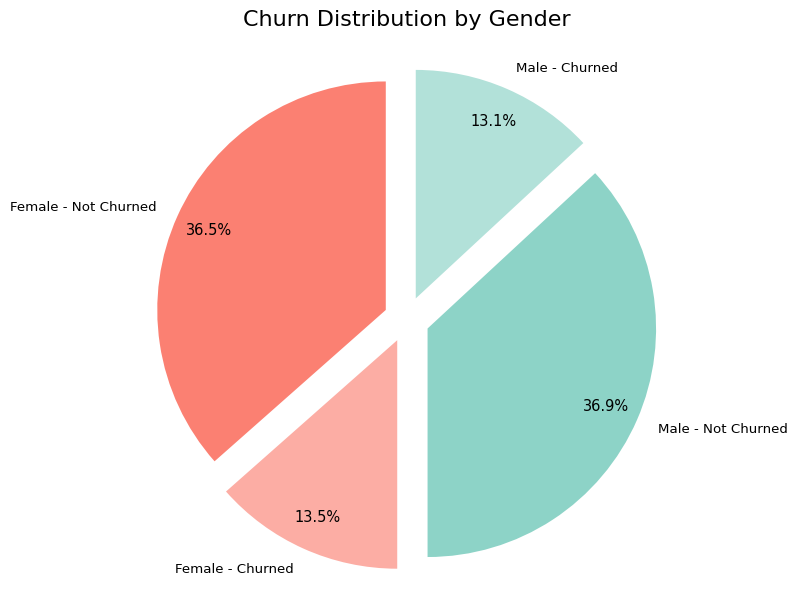

In [272]:
churn_by_gender_percentage = churn_by_gender.div(churn_by_gender.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(8, 8))
outer_values = churn_by_gender_percentage.values.flatten()
outer_labels = ['Female - Not Churned', 'Female - Churned', 'Male - Not Churned', 'Male - Churned']
outer_colors = ['#fb8072', '#fcada4', '#8dd3c7', '#b2e1d9' ]
explode = (0.1, 0.1, 0.1, 0.1)
ax.pie(outer_values, labels=outer_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

ax.set_title('Churn Distribution by Gender', fontsize=16)
plt.tight_layout()
plt.show()

Hardly any difference exists between men and women when it comes to switching service providers. Both genders show almost the same percentage and number of customers who changed firms.

#### Contract and Churn

/var/folders/k0/28fxcm8x4c99xqsw2ml0s2hw0000gn/T/ipykernel_1578/3180586163.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.countplot(data=df, x='Churn', hue='Contract', palette=cat_colors)


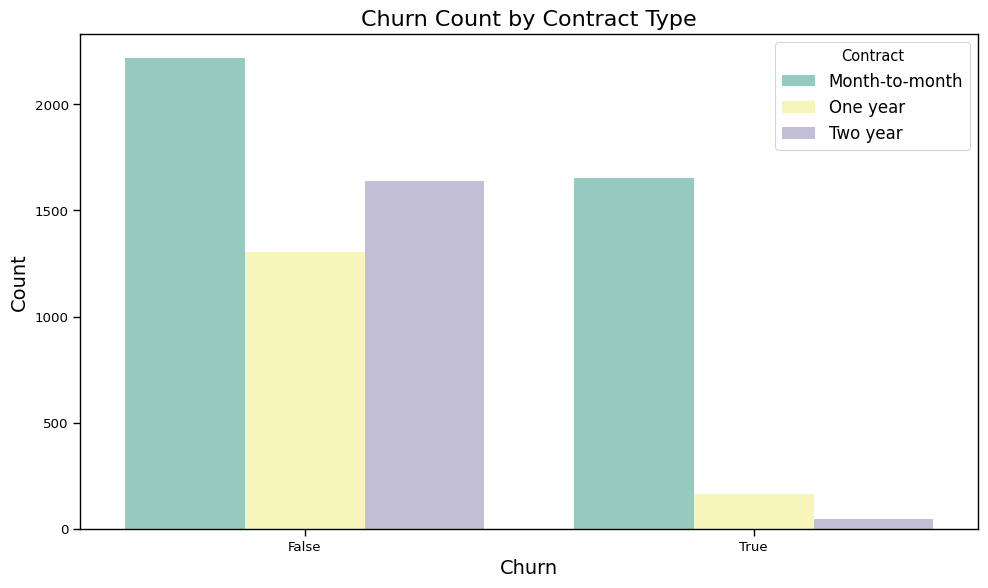

In [273]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='Contract', palette=cat_colors)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Churn Count by Contract Type', fontsize=16)
plt.legend(title='Contract', fontsize=12)
plt.tight_layout()
plt.show()

Around 75% of customers on **Month-to-Month** contracts chose to leave, compared to just 13% with **One-Year** contracts and 3% with **Two-Year** contracts.

#### Payment Method and Churn

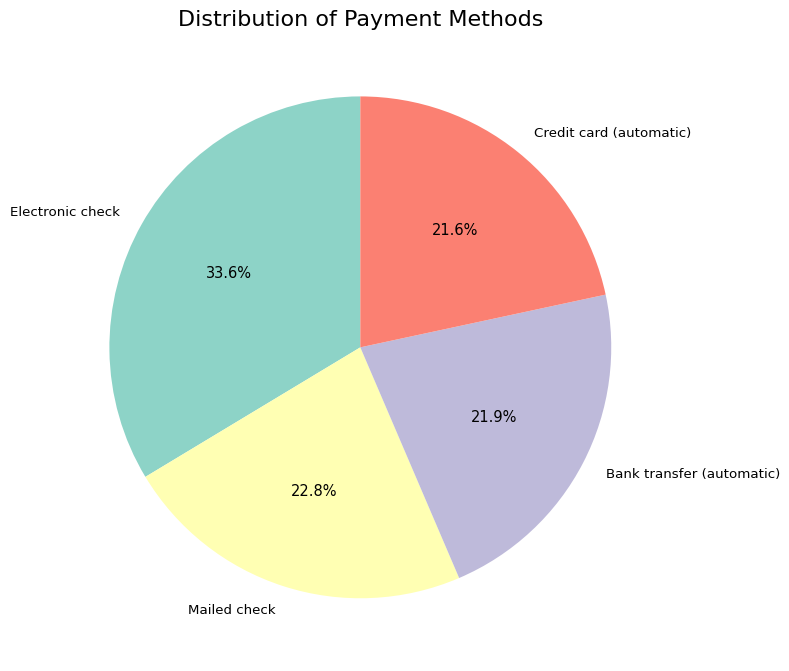

In [274]:
payment_method_counts = df['PaymentMethod'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90, colors=cat_colors)
ax.set_title('Distribution of Payment Methods', fontsize=16)
plt.tight_layout()
plt.show()

There are more **Electronic Check** customers than any other Payment Method.

/var/folders/k0/28fxcm8x4c99xqsw2ml0s2hw0000gn/T/ipykernel_1578/2033506768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_churn = df.groupby(['Churn', 'PaymentMethod']).size().unstack()


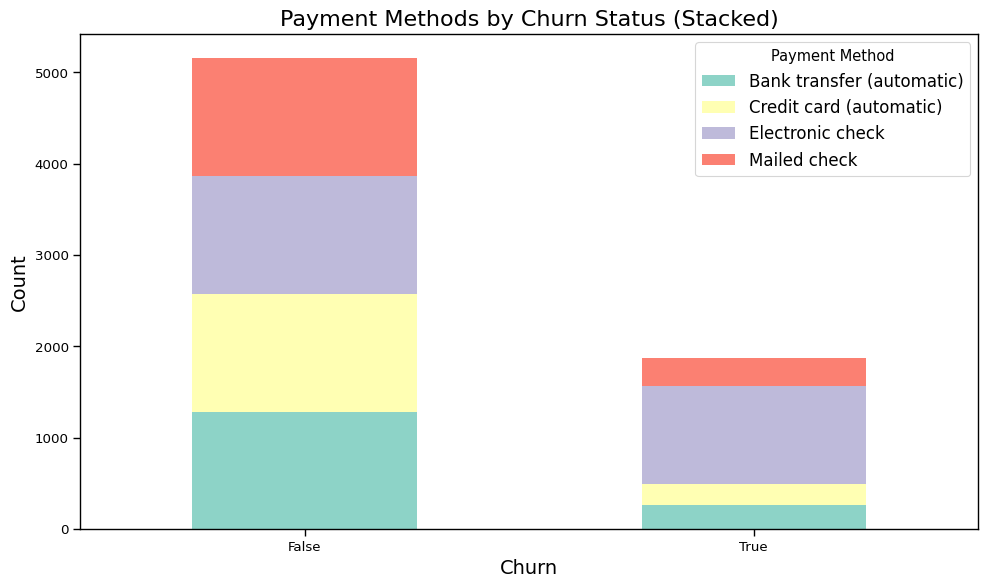

In [275]:
payment_churn = df.groupby(['Churn', 'PaymentMethod']).size().unstack()

payment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=cat_colors[:4])
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Payment Methods by Churn Status (Stacked)', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Payment Method', fontsize=12)
plt.tight_layout()
plt.show()

Most customers who left used **Electronic Check** as their payment method. Those paying by **Credit Card (automatic)** transfer,**Bank  transfer (automatic)**, or **Mailed Check** were less likely to leave.

### Internet Service and Churn

/var/folders/k0/28fxcm8x4c99xqsw2ml0s2hw0000gn/T/ipykernel_1578/3669896920.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.countplot(data=df, x='Churn', hue='InternetService', palette=cat_colors)


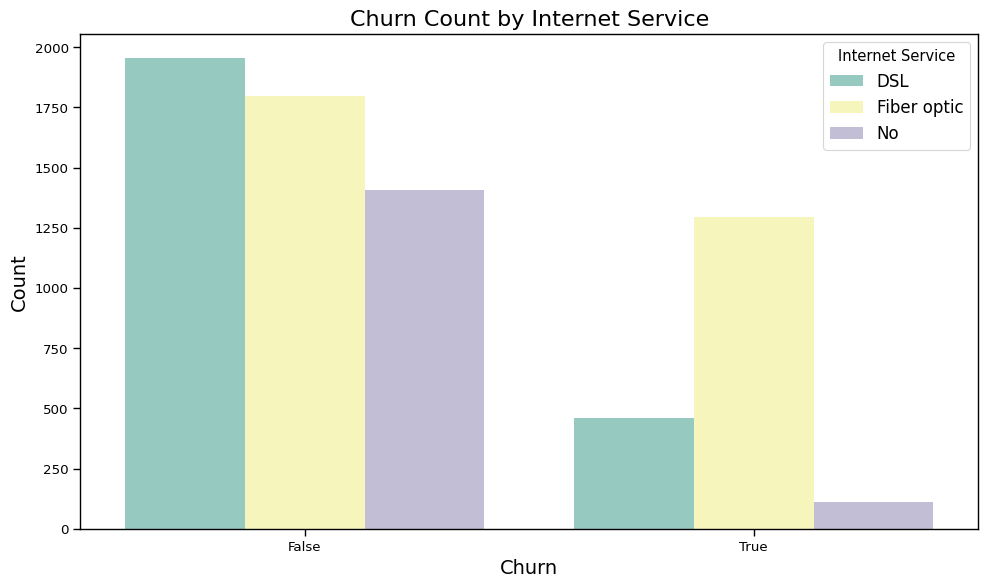

In [276]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='InternetService', palette=cat_colors)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Churn Count by Internet Service', fontsize=16)
plt.legend(title='Internet Service', fontsize=12)
plt.tight_layout()
plt.show()

Many customers use **Fiber Optic** service, but it’s also linked to a *higher* churn rate—possibly indicating dissatisfaction with that service. In contrast, **DSL** users make up a larger portion of the customer base and show a lower churn rate compared to **Fiber Optic** users.

#### Dependants and Churn

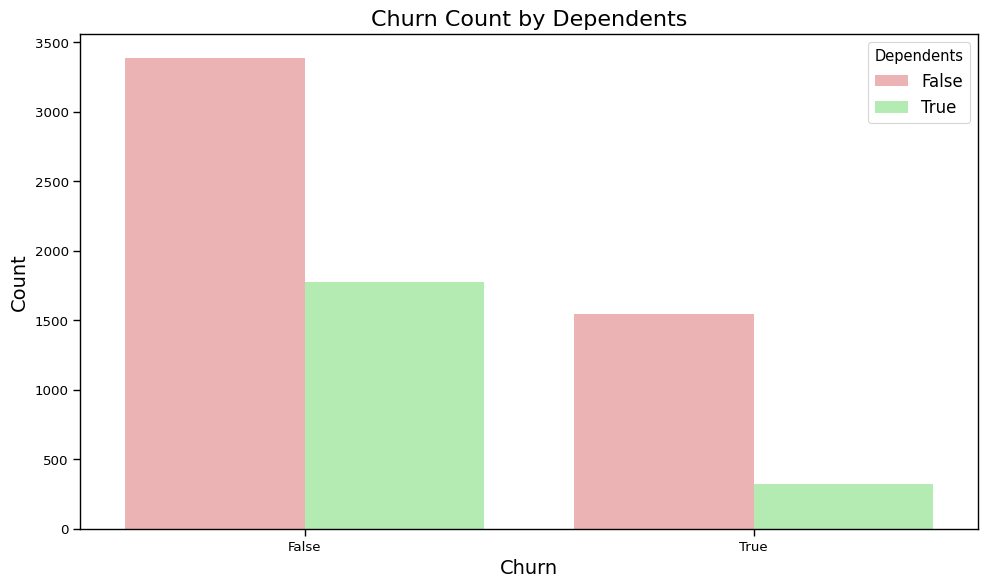

In [277]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='Dependents', palette=bool_colors)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Churn Count by Dependents', fontsize=16)
plt.legend(title='Dependents', fontsize=12)
plt.tight_layout()
plt.show()

Customers with **no dependants** are more likey to churn.

#### Partners and Churn

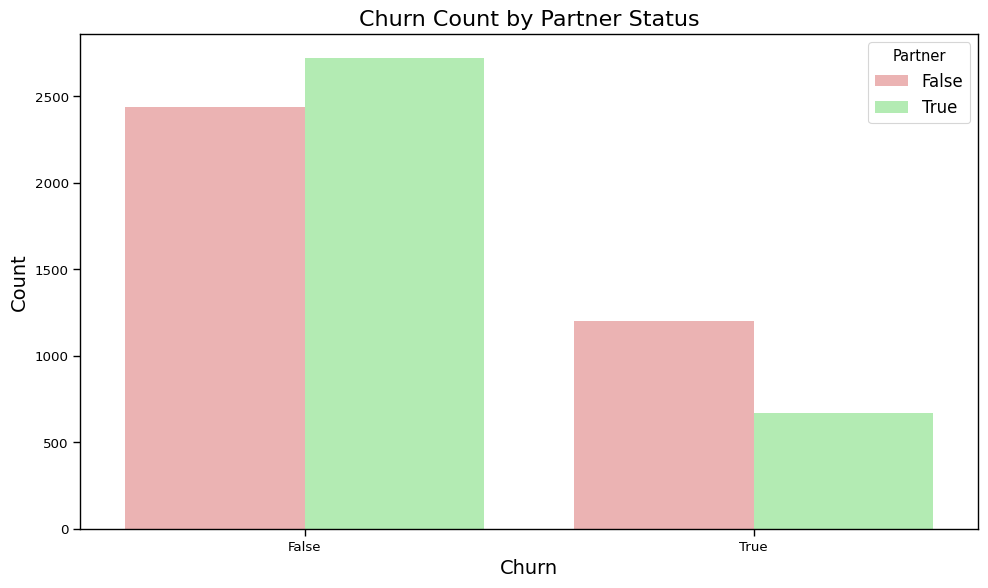

In [278]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='Partner', palette=bool_colors)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Churn Count by Partner Status', fontsize=16)
plt.legend(title='Partner', fontsize=12)
plt.tight_layout()
plt.show()

Customers with **no partners** are more likely to churn.

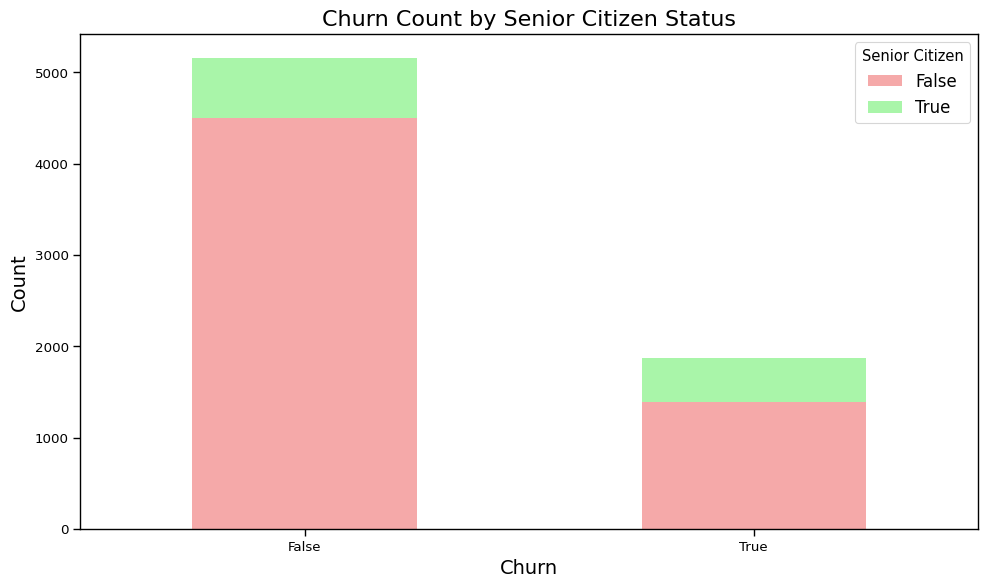

In [279]:
senior_churn = df.groupby(['Churn', 'SeniorCitizen']).size().unstack()

senior_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=bool_colors)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Churn Count by Senior Citizen Status', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Senior Citizen', fontsize=12)
plt.tight_layout()
plt.show()

The data shows **more non-seniors churn** in raw numbers.

#### Online Security and Churn

/var/folders/k0/28fxcm8x4c99xqsw2ml0s2hw0000gn/T/ipykernel_1578/3363805237.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.countplot(data=df, x='Churn', hue='OnlineSecurity', palette=cat_colors)


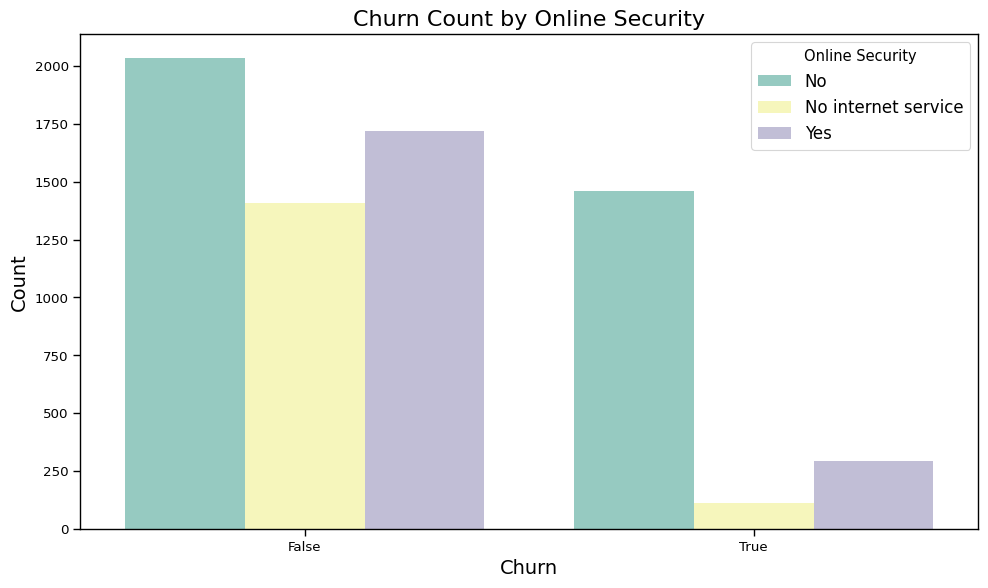

In [280]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='OnlineSecurity', palette=cat_colors)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Churn Count by Online Security', fontsize=16)
plt.legend(title='Online Security', fontsize=12)
plt.tight_layout()
plt.show()

Customers **without** online security are the **most likely** to churn.

#### Tech Support and Churn

/var/folders/k0/28fxcm8x4c99xqsw2ml0s2hw0000gn/T/ipykernel_1578/1956212212.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.countplot(data=df, x='Churn', hue='TechSupport', palette=cat_colors)


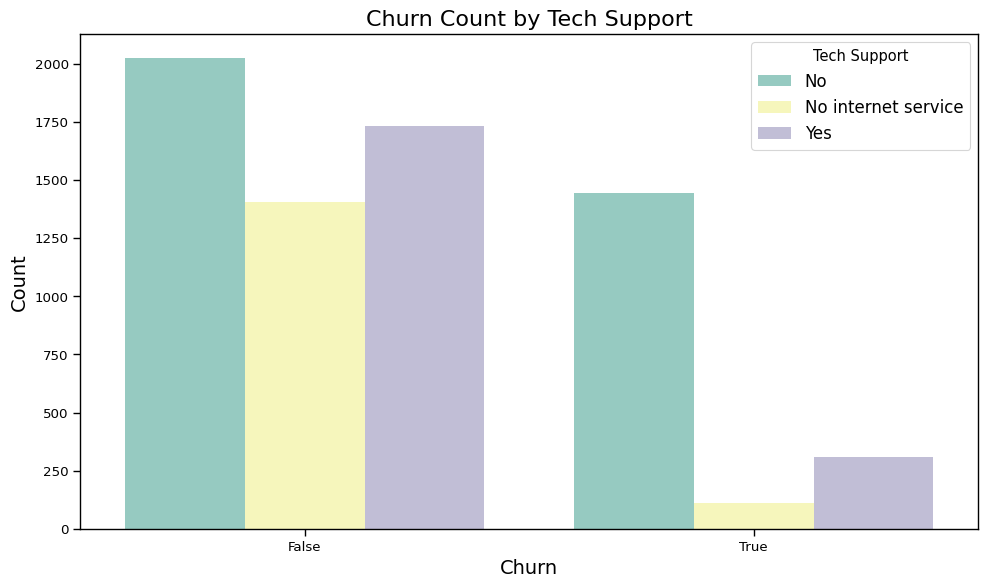

In [281]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='TechSupport', palette=cat_colors)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Churn Count by Tech Support', fontsize=16)
plt.legend(title='Tech Support', fontsize=12)
plt.tight_layout()
plt.show()

Customer with **no Tech Support** are most likey to churn.

#### Monthly Charges and Churn

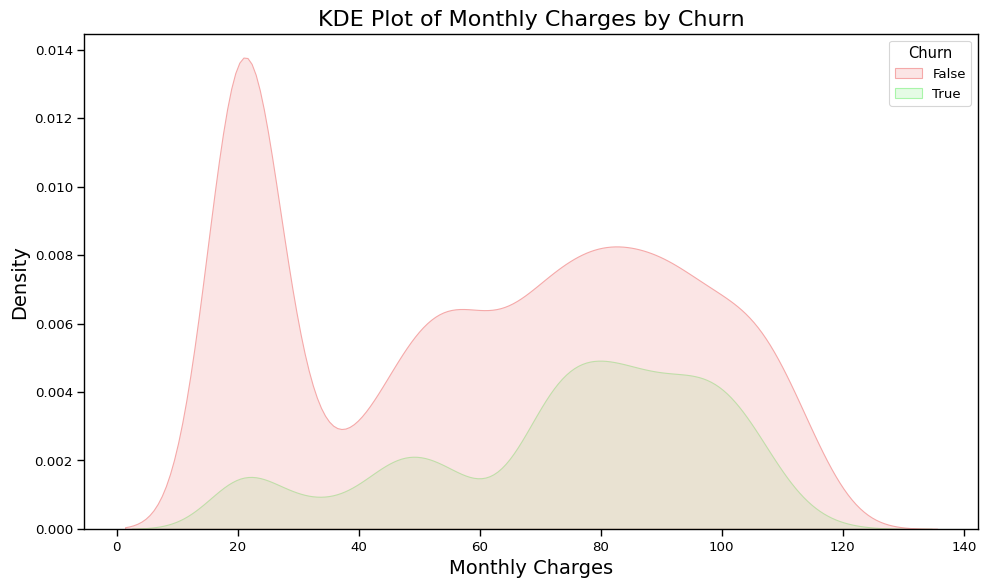

In [282]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette=bool_colors, alpha=0.3)
plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('KDE Plot of Monthly Charges by Churn', fontsize=16)
plt.tight_layout()
plt.show()

The **majority** of the churned customer have the **highest** monthly charges.

### Total Charges and Churn

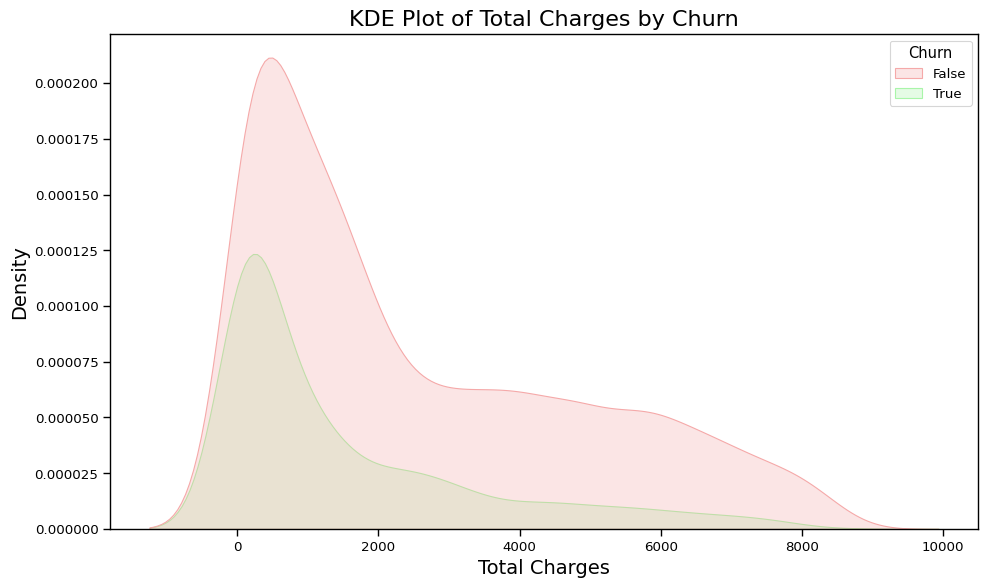

In [283]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, palette=bool_colors, alpha=0.3)
plt.xlabel('Total Charges', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('KDE Plot of Total Charges by Churn', fontsize=16)
plt.tight_layout()
plt.show()

#### Tenure and Churn

/var/folders/k0/28fxcm8x4c99xqsw2ml0s2hw0000gn/T/ipykernel_1578/1019011907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette=bool_colors)


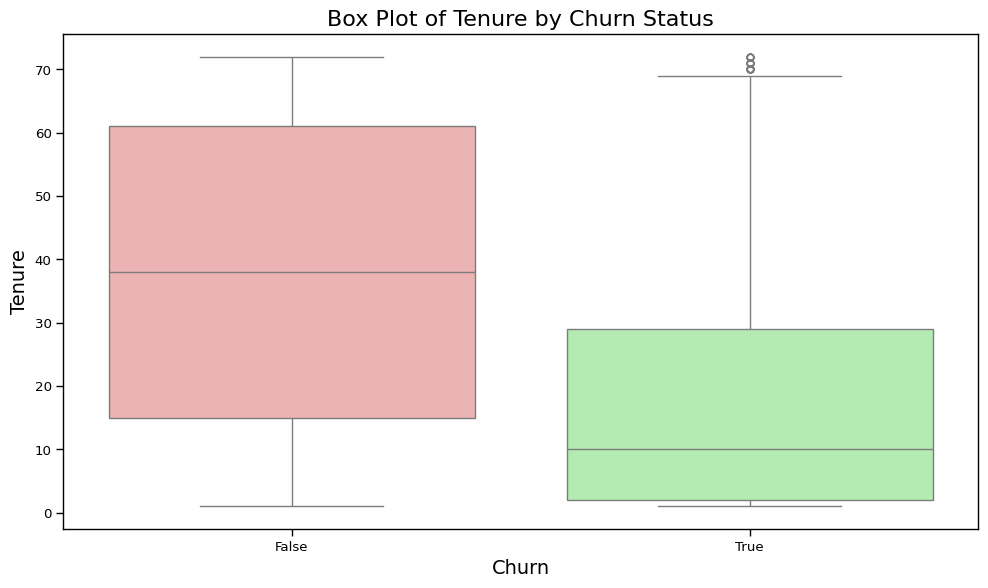

In [284]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure', palette=bool_colors)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Tenure', fontsize=14)
plt.title('Box Plot of Tenure by Churn Status', fontsize=16)
plt.tight_layout()
plt.show()

**Newer** customers (i.e. low tenure) have a **higher** tendency to churn.

## Step 4: Feature Encoding & Engineering 

In this Section we will encode booleans and categorical data, as well as standarizing numerical ones.

#### Numeric Standarization

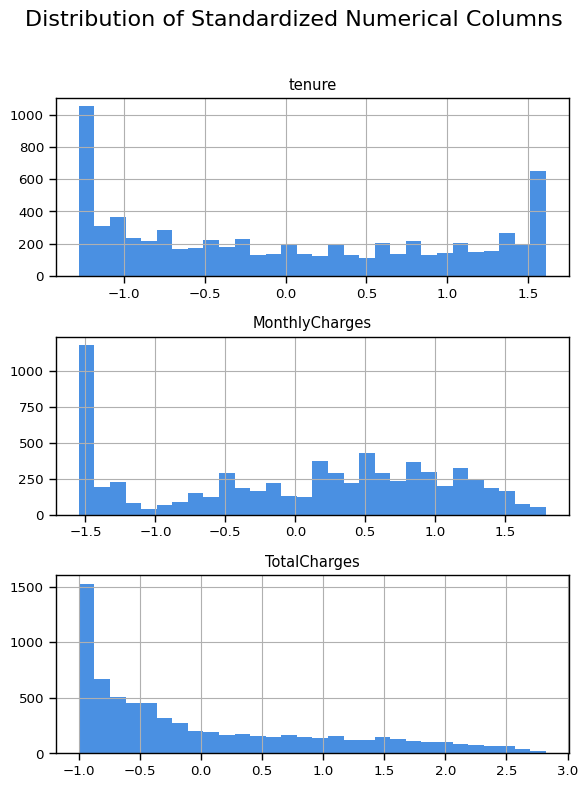

In [285]:
scaler = StandardScaler()
df[int_columns] = scaler.fit_transform(df[int_columns])


# Plot the distribution of the standardized numerical columns
df[int_columns].hist(bins=30, figsize=(6, 8), layout=(3, 1), color=int_colors[0])
plt.suptitle('Distribution of Standardized Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Categorical Encoding

In [286]:
# Dictionary to store reverse mappings
reverse_mapping = {}

label_encoder = LabelEncoder()
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])
    reverse_mapping[col] = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

df[cat_columns].head()


,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,gender
0,1,0,0,2,0,0,0,0,0,2,0
1,0,0,2,0,2,0,0,0,1,3,1
2,0,0,2,2,0,0,0,0,0,3,1
3,1,0,2,0,2,2,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,2,0


#### Binary Mapping

In [287]:
df[bool_columns] = df[bool_columns].astype(int)
df[bool_columns].head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn,SeniorCitizen
0,1,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,1,1,1,0
3,0,0,0,0,0,0
4,0,0,1,1,1,0


In [288]:
df.drop(columns=['customerID'], inplace=True)

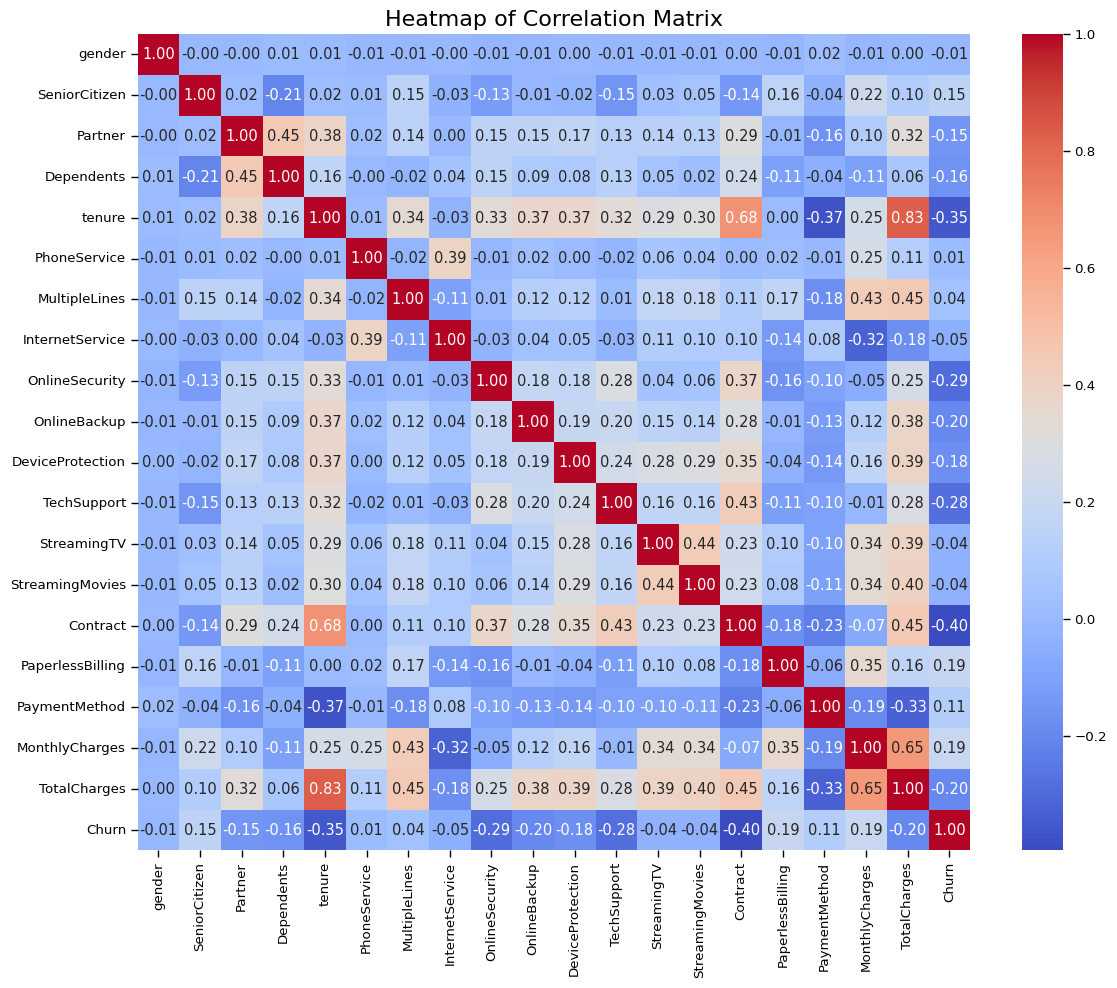

In [289]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

Finally, we will split the dataset into **train** and **test** splits to prepare for modeling.

In [290]:

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5625, 19)
X_test shape: (1407, 19)
y_train shape: (5625,)
y_test shape: (1407,)


## Step 5: Model Training & Evaluation

We'll train 3 models and compare their performance.


#### K-Nearest Neighbour (KNN)
intuitive and captures non-linear patterns.

In [291]:
knn = KNeighborsClassifier(n_neighbors = 11) 
knn.fit(X_train,y_train)
predicted_y = knn.predict(X_test)
accuracy_knn = knn.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7647476901208244


#### Logistic Regression
as it is effective for binary classification

In [292]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train,y_train)
accuracy_lr = logreg.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7931769722814499


#### Decision Trees
also handles non-linear relationships

In [293]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictdt_y = dt.predict(X_test)
accuracy_dt = dt.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7199715707178393


**Decision Trees** has the lowest accuracy of them all.

## Step 6: Hyperparameter Tuning

We'll fine-tune our best model using GridSearchCV.


In [294]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9], #controls how many neighbors vote on the classification. Tested multiple values to balance bias and variance.
    'weights': ['uniform', 'distance'], # 'uniform' means all neighbors have equal weight, 'distance' means closer neighbors have more influence, which can improve local decision-making.
    'metric': ['euclidean', 'manhattan'] #Different distance metrics could capture different data structures.
}

logreg_params = {
    'C': [0.01, 0.1, 1, 10],  #tested a range to find balance between underfitting and overfitting.
    'solver': ['liblinear'],  #good for small datasets & binary classification
    'penalty': ['l1', 'l2'] # ‘l1’ can perform feature selection by shrinking some coefficients to zero; ‘l2’ penalizes large coefficients to reduce complexity.
}

# Decision Tree parameters
dt_params = {
    'max_depth': [3, 5, 10, None], #to control the maximum depth of the tree to prevent overfitting.
    'min_samples_split': [2, 5, 10], #may control how sensitive the tree is to noise.
    'criterion': ['gini', 'entropy'] # 'gini' is faster, 'entropy' can provide better splits.
}

In [295]:
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy')
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')

knn_grid.fit(X_train, y_train)
logreg_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [296]:
print("Best KNN params:", knn_grid.best_params_)
print("Best KNN accuracy:", knn_grid.best_score_)

Best KNN params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best KNN accuracy: 0.7772444444444444


In [297]:
print("Best Logistic Regression params:", logreg_grid.best_params_)
print("Best Logistic Regression accuracy:", logreg_grid.best_score_)

Best Logistic Regression params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression accuracy: 0.7996444444444444


In [298]:
print("Best Decision Tree params:", dt_grid.best_params_)
print("Best Decision Tree accuracy:", dt_grid.best_score_)

Best Decision Tree params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Decision Tree accuracy: 0.7889777777777778


•	All **three** models improved in accuracy after hyperparameter tuning, confirming that tuning helps optimize model performance.\
•	**KNN** improved modestly from ~76.5% to ~77.7%, showing better neighbor and distance choices helped.\
•	**Logistic Regression** showed a smaller but meaningful improvement from ~79.3% to ~79.9%, indicating better regularization settings.\
•	**Decision Tree** had the largest improvement from ~71.9% to ~78.9%, suggesting that controlling tree complexity and splits greatly reduced overfitting and enhanced generalization.

## Step 7: Final Thoughts

We summarize our findings and business recommendations.


Looking at the data, it’s clear that contract type, **payment method**, and **service quality** play big roles in why customers leave. Customers on **Month-to-Month** contracts and those paying by **Electronic Check** are much *more likely* to churn. That tells us there’s a real opportunity to keep more customers by encouraging *longer contracts* and maybe pushing for *more stable payment options*.

The higher churn rate among **Fiber Optic** users stands out—it might mean people aren’t fully happy with that service, so it’s worth digging deeper there. Also, customers **without online security** or tech support are leaving more often, which suggests improving these services could help keep them around.

The models we built improved with *tuning*, but there’s room to get even better by adding more data or features. **New customers** and those with **higher monthly bills** seem to be at greater risk of leaving, so focusing retention efforts on these groups makes sense.

Of course, this analysis is based on the data we have, and it doesn’t capture everything, like customer feelings or recent changes. Going forward, adding feedback data and running tests on retention strategies would help confirm what really works.

Overall, this gives a solid starting point to reduce churn and improve customer experience by focusing on the areas that matter most. 

I really hope you enjoyed this notebook, and I hope I added anything to your knowledge warehouse.